In [256]:
from tqdm import tqdm
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [257]:
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((224,224)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root='PlantVillage/train', transform=transform)

In [258]:
for 

SyntaxError: invalid syntax (<ipython-input-258-eaf083cb72bb>, line 1)

In [259]:
def make_weights_for_balanced_classes(images, nclasses):                        
    count = [0] * nclasses                                                      
    for item in images:                                                         
        count[item[1]] += 1                                                     
    weight_per_class = [0.] * nclasses                                      
    N = float(sum(count))                                                   
    for i in range(nclasses):                                                   
        weight_per_class[i] = N/float(count[i])                                 
    weight = [0] * len(images)                                              
    for idx, val in enumerate(images):                                          
        weight[idx] = weight_per_class[val[1]]                               
    return weight

In [260]:
weights = make_weights_for_balanced_classes(trainset.imgs, len(trainset.classes))                                                                
weights = torch.DoubleTensor(weights)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))

In [300]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, sampler=sampler, pin_memory=True)

testset = torchvision.datasets.ImageFolder(root='PlantVillage/val', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

In [270]:
len(weights)

44016

In [271]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [272]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        n_classes = 39
        
        hidden_1 = 1024
        hidden_2 = 256
        
        self.fc1 = nn.Linear(9216, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, n_classes)
        
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 9216)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

net = torchvision.models.alexnet(pretrained=True)

for param in net.parameters():
    param.requires_grad = False
net.classifier = Net()
net.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Net(
    (fc1): Linear(in_features=9216, out_features=1024, bias=True)
    (fc2): Linear(in_features=1024, out_featu

In [273]:
# net = torchvision.models.alexnet(pretrained=False)
# net = net.to(device)

In [274]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(net.parameters())

In [303]:
valid_loss_min=np.Inf
train_loss_plt=[]
valid_loss_plt = []
valid_accuracy_plt=[]
valid_loss = []
for epoch in tqdm(range(1)):
    train_loss=0
    valid_loss=0
    
#     net.train()
#     for images, labels in trainloader:
#         images, labels = images.to(device), labels.to(device)
#         print (labels)
#         optimizer.zero_grad()
#         output = net(images)
#         loss = criterion(output, labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item() * images.size(0)
    
    net.eval()
    for images, labels in testloader:
        images, labels= images.cuda(), labels.cuda()
        output = net(images)
        _, pred = torch.max(output,1)
        print (labels, pred)
        #print (output)
        ps=torch.exp(output)
        top_p, top_class=ps.topk(1, dim=1)
        equals= top_class==labels.view(*top_class.shape)
        loss = criterion(output, labels)
        valid_loss += loss.item() * images.size(0)
        
    #train_loss /= len(trainloader)
    #valid_loss /= len(testloader)
   # train_loss_plt.append(train_loss)
    #valid_loss.append(valid_loss)
    #valid_loss_plt.append(valid_loss)

    #print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch+1, train_loss,valid_loss))






  0%|          | 0/1 [00:00<?, ?it/s]

tensor([36], device='cuda:0') tensor([3], device='cuda:0')
tensor([15], device='cuda:0') tensor([24], device='cuda:0')
tensor([2], device='cuda:0') tensor([14], device='cuda:0')
tensor([13], device='cuda:0') tensor([14], device='cuda:0')
tensor([19], device='cuda:0') tensor([14], device='cuda:0')
tensor([9], device='cuda:0') tensor([5], device='cuda:0')
tensor([8], device='cuda:0') tensor([14], device='cuda:0')
tensor([34], device='cuda:0') tensor([14], device='cuda:0')
tensor([4], device='cuda:0') tensor([3], device='cuda:0')
tensor([31], device='cuda:0') tensor([3], device='cuda:0')
tensor([30], device='cuda:0') tensor([14], device='cuda:0')
tensor([28], device='cuda:0') tensor([5], device='cuda:0')
tensor([28], device='cuda:0') tensor([14], device='cuda:0')
tensor([19], device='cuda:0') tensor([14], device='cuda:0')
tensor([5], device='cuda:0') tensor([14], device='cuda:0')
tensor([16], device='cuda:0') tensor([3], device='cuda:0')
tensor([16], device='cuda:0') tensor([3], device='c






100%|██████████| 1/1 [01:11<00:00, 71.88s/it]

tensor([37], device='cuda:0') tensor([14], device='cuda:0')


In [198]:
import joblib
joblib.dump(train_loss_plt, 't.joblib')
joblib.dump(valid_loss_plt, 'v.joblib')

['v.joblib']

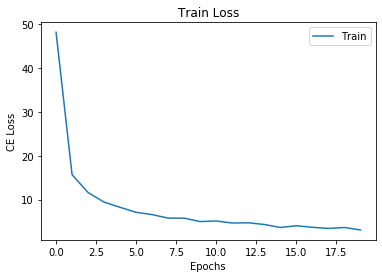

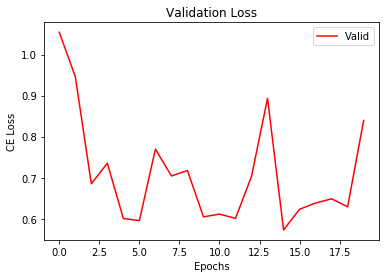

In [199]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(train_loss_plt)), train_loss_plt,label='Train')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('CE Loss')
plt.legend()
plt.show()
plt.plot(np.arange(len(valid_loss_plt)),valid_loss_plt,label='Valid',color='r')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('CE Loss')
plt.legend()
plt.show()

In [237]:
x = [1,2,3]
y = [4,5,6]

In [255]:
for (i,j) in zip(x,y): 
    print (i,j)

1 4
2 5
3 6


In [251]:
import itertools, zip

ModuleNotFoundError: No module named 'zip'

In [277]:
accuracy=0

with torch.no_grad():
    net.eval()
    for images, labels in testset:
        images, labels = images.cuda(), labels.cuda()
        output = net(images)
        ps=torch.exp(output)
        top_p, top_class=ps.topk(1, dim=1)

        equals= top_class==labels.view(*top_class.shape)
        accuracy+=torch.mean(equals.type(torch.FloatTensor))
    
print("Test Accuracy: {:.3f}".format(accuracy/len(testset)))

AttributeError: 'int' object has no attribute 'cuda'